<a href="https://colab.research.google.com/github/itsHariom09/AIML_Project/blob/main/American_Express_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning via ANN

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Importing dataset**

In [4]:
df=pd.read_csv("/content/amex_user_exit.csv")

In [5]:
df.head()

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
0,553.0,Delhi,Female,45.0,4.0,0.000,4.0,1.0,274150.0,0.0
1,447.0,Bengaluru,Male,31.0,7.0,0.000,4.0,1.0,519360.0,0.0
2,501.0,Delhi,Female,32.0,2.0,0.000,4.0,1.0,545501.0,0.0
3,428.0,Delhi,Male,51.0,3.0,0.000,4.0,1.0,86868.0,0.0
4,492.0,Delhi,Female,57.0,6.0,1912681.501,2.0,1.0,518680.0,0.0


In [6]:
df.shape

(9929, 10)

In [7]:
df=df.dropna()

In [8]:
df.tail()

,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
9922,594.0,Bengaluru,Male,28.0,6.0,0.000000e+00,4.0,1.0,394810.0,0.0
9923,557.0,Bengaluru,Male,59.0,3.0,8.050490e+05,2.0,0.0,58163.0,1.0
9924,627.0,Mumbai,Female,42.0,4.0,1.893594e+06,4.0,0.0,494067.0,0.0
9925,600.0,Bengaluru,Female,51.0,0.0,9.031778e+05,2.0,1.0,109375.0,1.0
9926,553.0,Delhi,Male,75.0,7.0,0.000000e+00,4.0,1.0,180031.0,0.0


In [9]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [10]:
print(X)

[[553.0 'Delhi' 'Female' ... 4.0 1.0 274150.0]
 [447.0 'Bengaluru' 'Male' ... 4.0 1.0 519360.0]
 [501.0 'Delhi' 'Female' ... 4.0 1.0 545501.0]
 ...
 [627.0 'Mumbai' 'Female' ... 4.0 0.0 494067.0]
 [600.0 'Bengaluru' 'Female' ... 2.0 1.0 109375.0]
 [553.0 'Delhi' 'Male' ... 4.0 1.0 180031.0]]


In [11]:
print(y)

[0. 0. 0. ... 0. 1. 0.]


**Encoding Categorical Data**

In [12]:
# Gender Column : Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [13]:
print(X)

[[553.0 'Delhi' 0 ... 4.0 1.0 274150.0]
 [447.0 'Bengaluru' 1 ... 4.0 1.0 519360.0]
 [501.0 'Delhi' 0 ... 4.0 1.0 545501.0]
 ...
 [627.0 'Mumbai' 0 ... 4.0 0.0 494067.0]
 [600.0 'Bengaluru' 0 ... 2.0 1.0 109375.0]
 [553.0 'Delhi' 1 ... 4.0 1.0 180031.0]]


In [14]:
# Geograpgy column : One hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [15]:
X[2]

array([0.0, 1.0, 0.0, 501.0, 0, 32.0, 2.0, 0.0, 4.0, 1.0, 545501.0],
      dtype=object)

**Splitting dataset into Training and Test set**

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#ANN

In [18]:
# Initialization
ann=tf.keras.models.Sequential()

In [19]:
# Adding Input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))

In [20]:
# Adding second hidden layer
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))

In [21]:
# Adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# ANN Training

In [22]:
# Compiling ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# Training in traning dataset
ann.fit(X_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6158 - loss: 0.7052
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.5106
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4737
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7959 - loss: 0.4629
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4409
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4560
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4351
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7942 - loss: 0.4417
Epoch 9/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4396
Epoch 10/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4227
Epoch 11/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4204
Epoch 12/120
249/249 ━━━━━━━━━━━━━━━━━━━━

In [24]:
from sklearn.metrics import accuracy_score
y_pred=ann.predict(X_test)
accuracy=accuracy_score(y_test,y_pred.round())

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
print(f"Accuracy: {accuracy*100:.2f} %")

Accuracy: 85.70 %


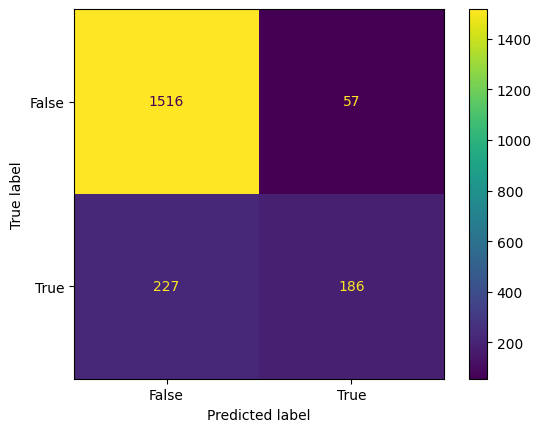

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred.round())
con_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con, display_labels = [False, True])
con_display.plot()
plt.show()
